# MDI220
# Statistiques

# Mini-project 

## Votre nom: El arji Hamza

## Imports

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, gaussian_kde
import seaborn as sns
from datetime import datetime
from scipy.integrate import quad
from scipy.stats import norm, gaussian_kde
import numpy as np
from scipy.integrate import simps

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [104]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [105]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [106]:
regions = list(df.region.unique())

In [107]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [108]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [109]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [110]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

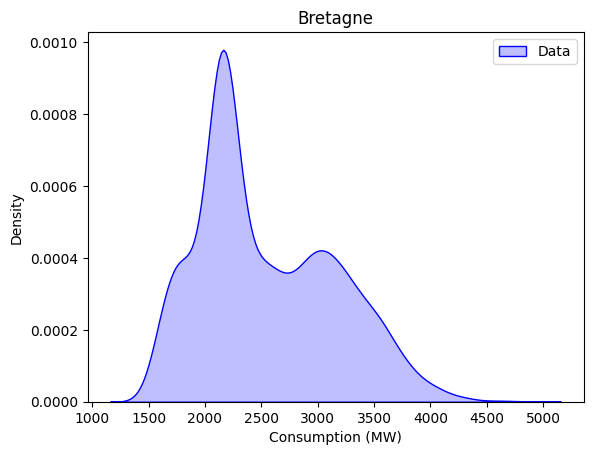

In [111]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

1.Pour l'estimateur de la moyenne:


\begin{align*}
E(\hat{\mu}) &= E\left(\frac{1}{n} \sum_{i=1}^n x_i\right) \\
&= \frac{1}{n} \sum_{i=1}^n E(x_i) \quad \text{car l'espérance est linéaire} \\
&= \frac{1}{n} \sum_{i=1}^n \mu \quad \text{car la moyenne réelle est \(\mu\)} \\
&= \frac{1}{n} \cdot n \cdot \mu \\
&= \mu
\end{align*}

Donc, l'estimateur de la moyenne $ \hat{\mu} $ est sans biais car $E(\hat{\mu}) = \mu. $

2.Pour l'estimateur de la variance:


\begin{align*}
E(\hat{\sigma^2}) &= E\left(\frac{1}{n-1} \sum_{i=1}^n (x_i- \hat{\mu})^2\right) \\
&= \frac{1}{n-1} \sum_{i=1}^n E((x_i- \hat{\mu})^2) \quad \text{car l'espérance est linéaire} \\
&= \frac{1}{n-1} \sum_{i=1}^n \mathbb{E}((x_i - \mu + \mu - \hat{\mu})^2) \\
&= \frac{1}{n-1} \sum_{i=1}^n \mathbb{E}((x_i - \mu)^2) + 2\frac{1}{n-1} \sum_{i=1}^n \mathbb{E}((x_i - \mu)(\mu - \hat{\mu})) + \frac{1}{n-1} \sum_{i=1}^n \mathbb{E}((\mu - \hat{\mu})^2) \\
&= \frac{n}{n-1} \mathbb{E}((x_1 - \mu)^2) + 2\frac{n}{n-1}\mathbb{E}((x_1 - \mu)(\mu - \hat{\mu})) + \frac{n}{n-1}\mathbb{E}((\mu - \hat{\mu})^2)  \quad   (\text{car les } x_i \text{ sont i.i.d.} )\\
\end{align*}

Or : 
$$
\mathbb{E}((x_1 - \mu)^2) = \sigma^2
$$

De plus,
\begin{align*}
\mathbb{E}((x_1 - \mu)(\mu - \hat{\mu})) &= \mathbb{E}(x_1\mu) - \mathbb{E}(x_1\hat{\mu}) - \mathbb{E}(\mu^2)+ \mathbb{E}(\mu\hat{\mu}) \\
&= \mu\mu - \frac{1}{n} \sum_{i=1}^n \mathbb{E}(x_1x_i)-\mu^2+\mu\mu \\
&= \mu^2 - \frac{1}{n} \sum_{i=1}^n \mathbb{E}(x_1x_i) \\
&= \mu^2 - \frac{1}{n} \left(1(\sigma^2 + \mu^2) + (n-1)\mu^2\right) \\
&= \mu^2 - \frac{1}{n} (\sigma^2 + n\mu^2) \\
&= -\frac{1}{n} \sigma^2
\end{align*}

Enfin,
\begin{align*}
\mathbb{E}((\mu - \hat \mu)^2) &= \mathbb{E}(\mu^2) - 2\mathbb{E}(\mu \hat \mu) + \mathbb{E}(\hat \mu^2) \\
&= \mu^2 - 2\mu\mu + \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n \mathbb{E}(x_i x_j) \\
&= -\mu^2 + \frac{1}{n^2} (n \mathbb{E}(x_1x_1) + (n^2 - n)\mathbb{E}(x_1x_2)) \\
&= -\mu^2 + \frac{1}{n^2} (n\sigma^2 + n\mu^2 + (n^2 - n)\mu^2) \\
&= -\mu^2 + \frac{1}{n^2} (n\sigma^2 + n^2\mu^2)\\
&= \frac{1}{n} \sigma^2
\end{align*}

Donc on peut conclure que : 

$$
E(\hat{\sigma^2})= \sigma^2
$$


Cela signifie que l'estimateur de la variance  $\hat{\sigma^2}$  est sans biais, car son espérance est égale à la vraie variance $\sigma^2$. 

En conclusion, les estimateurs de la moyenne  $ \hat{\mu} $ et de la variance $\hat{\sigma^2}$ sont tous deux sans biais 


2. Donnez les valeurs obtenues pour la moyenne et pour la variance en utilisant ces estimateurs.

In [112]:
# Calcul de l'estimateur de la moyenne (mu_hat)
mu_hat = df_region['consumption'].mean()

# Calcul de l'estimateur de la variance (sigma_squared_hat)
n = len(df_region)
sigma_squared_hat = ((df_region['consumption'] - mu_hat) ** 2).sum() / (n - 1)

print("La moyenne est :", mu_hat)
print("La variance est :", sigma_squared_hat)

La moyenne est : 2546.536155666579
La variance est : 365956.0141448174


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [113]:
# Génération de nouvelles données gaussiennes
new_data = np.random.normal(mu_hat, np.sqrt(sigma_squared_hat),n)
print(new_data)

[2882.75810324 2134.34252446 2992.51906321 ... 2554.76966066 2202.87252935
 3342.40583762]


4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

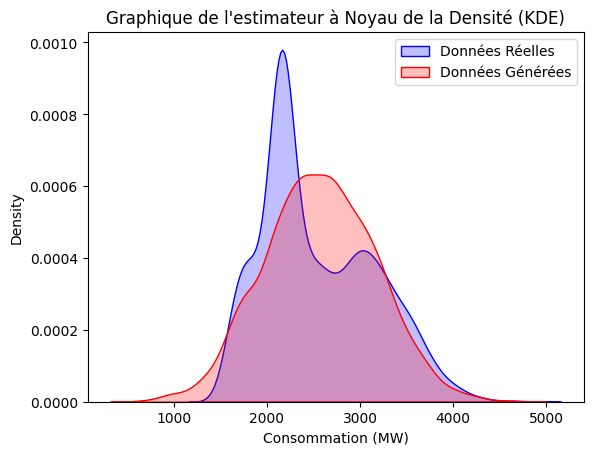

In [114]:
# Tracer l'estimateur à noyau de la densité (KDE) des données réelles et des données générées
sns.kdeplot(data=df_region, x="consumption", label="Données Réelles", color='blue', fill=True)
sns.kdeplot(data=new_data, label="Données Générées", color='red', fill=True)
plt.title("Graphique de l'estimateur à Noyau de la Densité (KDE)")
plt.xlabel("Consommation (MW)")
plt.legend() 
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

C:\Users\hamza\AppData\Local\Temp\ipykernel_14644\3525674138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region.loc[:, 'date'] = pd.to_datetime(df_region['date'])
C:\Users\hamza\AppData\Local\Temp\ipykernel_14644\3525674138.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_region.loc[:, 'date'] = pd.to_datetime(df_region['date'])
C:\Users\hamza\AppData\Local\Temp\ipykernel_14644\3525674138.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  donnees_reelles_hiver = [consumption

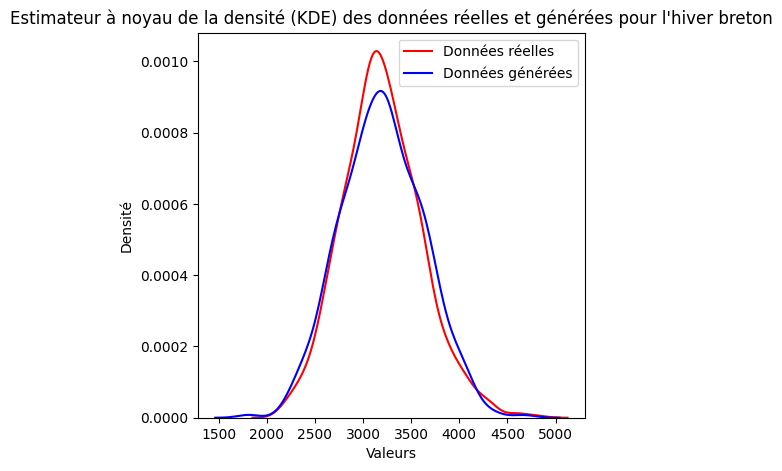

In [115]:
# On s'assure que la colonne "date" est de type datetime
df_region.loc[:, 'date'] = pd.to_datetime(df_region['date'])

# Création d'une liste de plages de dates correspondant aux saisons hivernales
hiver_dates = [(datetime(annee, 12, 22), datetime(annee + 1, 3, 21)) for annee in range(2013, 2024)]

# Initialisation de la liste pour les données réelles
donnees_reelles_hiver = [consumption for debut, fin in hiver_dates for consumption in df_region[(df_region['date'] >= debut) & (df_region['date'] <= fin)][(df_region['region'] == 'Bretagne')]['consumption']]

# Création de dataframes pour les données réelles
df_r_h = pd.DataFrame({"Données réelles": donnees_reelles_hiver})

# Estimeurs de la moyenne et de la variance pour les jours d'hiver
mu_hat_winter = df_r_h['Données réelles'].mean()
d = len(df_r_h)
sigma_squared_hat_winter = ((df_r_h['Données réelles'] - mu_hat_winter) ** 2).sum() / (d - 1)

# Génération de nouvelles données gaussiennes pour les jours d'hiver
new_data_winter = np.random.normal(mu_hat_winter, np.sqrt(sigma_squared_hat_winter), len(df_r_h))

# Création de dataframes pour les données générées
df_g_h = pd.DataFrame({"Données générées": new_data_winter})

# Tracé de l'estimateur à noyau de la densité pour les jours d'hiver
plt.figure(figsize=(5, 5))
sns.kdeplot(data=df_r_h["Données réelles"], label="Données réelles", color="red")
sns.kdeplot(data=df_g_h["Données générées"], label="Données générées", color="blue")
plt.legend()
plt.title("Estimateur à noyau de la densité (KDE) des données réelles et générées pour l'hiver breton")
plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.show()


6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

L'hypothèse gaussienne est plus appropriée pour les données générées en hiver.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

1. Montrons que $ d(f,g) \in [0,1] $:

Tout d'abord, pour tout $ x \in \mathbb{R}$ , nous avons : 
$$
\begin{align*}
0 &\leq |f(x) - g(x)| \leq |f(x)| + |g(x)| = f(x) + g(x) \text{ (car } f \text{ et } g \text{ sont positifs).} \\
\end{align*}

$$
En intégrant sur $ \mathbb{R}$  et en multipliant par $\frac{1}{2}$,nous obtenons :
$$

\begin{align*}
0 &\leq d(f,g) \leq \frac{1}{2} \int f + \frac{1}{2} \int g. \\
\end{align*}
$$
Or:
$$

\begin{align*}
\frac{1}{2} \int f + \frac{1}{2} \int g = \frac{1}{2} + \frac{1}{2} = 1.
\end{align*}
$$
D'où le résultat $ d(f,g) \in [0,1] $.





2.Montrons que $d(f,g) = 0$ si et seulement si $f = g$ presque partout :

Si $d(f,g) = 0$, alors

$\frac{1}{2} \int |f(x) - g(x)| \, dx = 0.$


Cela équivaut que l'intégrale
$
\int |f(x) - g(x)| \, dx =0
$

Or, l'intégrale d'une fonction positive est nulle si et seulement si la fonction est nulle presque partout.
Donc : 
$$
|f(x) - g(x)| =0 pp
$$
ainsi cela équivaut à f=g pp


2.Montrons que $d(f,g) = 1$ si et seulement si $f = g$ presque partout :

Si $d(f,g) = 1$, alors
$$\frac{1}{2} \int |f(x) - g(x)| \, dx = 1.$$
$$ainsi \int |f(x) - g(x)| \, dx =2$$
$$\quad \text{On a donc} \int |f(x) - g(x)| \, dx = 2 = \int |f(x)| \, dx +\int |g(x)| \, dx$$
$$\quad \text{On a donc } \forall x \in  R \quad \text{tq f(x)!=0 , on a g(x)=0. Par symétrie des roles joués par f et g on peut en conclure que f et g sont à support disjoints.} $$

Réciproquement, si f et g sont à support disjoints, on note Df et Dg leurs supports respectifs : 
$$ 2d(f,g)= \int |f(x) - g(x)| \, dx =\int_{Df} |f(x) - g(x)| \, dx +\int_{Dg} |f(x)-g(x)| \, dx + \int_{Dg \cap Df} |f(x)-g(x)| =  \int_{Df} |f(x)| \, dx +\int_{Dg} |g(x)| \, dx = 2 $$
$$\quad \text{On peut donc conclure que d(f,g) = 1 }$$

On a bien montré que $d(f,g) \in [0,1]$ , avec  d(f,g)=0 si et seulement si f=g presque partout (pour la mesure de Lebesgue) et d(f,g)=1 si et seulement si f et g possèdent des supports disjoints.

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

Dissimilarité entre le KDE des données réelles et la densité du modèle gaussien : 0.17372249616927704


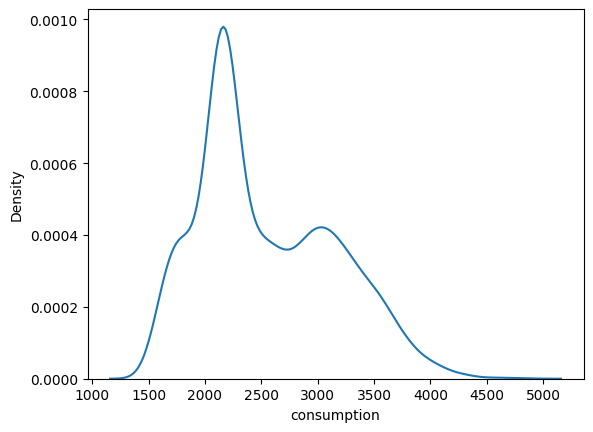

In [116]:
# KDE des données réelles
kde_real = sns.kdeplot(data=df_region, x="consumption").get_lines()[0].get_data()
x_kde_real, y_kde_real = kde_real[0],kde_real[1]

# Création de la fonction de densité du modèle gaussien avec les estimateurs
gaussian_model = norm(loc=mu_hat, scale=np.sqrt(sigma_squared_hat))

# Définition de la fonction de dissimilarité
def dissimilarity(x):
    gaussian_pdf = gaussian_model.pdf(x)
    return 0.5 * np.abs(y_kde_real - gaussian_pdf)

# Intégration numérique de la fonction de dissimilarité
dissimilarity_value = simps(dissimilarity(x_kde_real), x_kde_real)

print("Dissimilarité entre le KDE des données réelles et la densité du modèle gaussien :", dissimilarity_value)



3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [117]:
# Génération d'un modèle gaussien avec les paramètres calculés question A.5
gaussian_model_hiver = norm(loc=mu_hat_winter, scale=np.sqrt(sigma_squared_hat_winter))

# Échantillonnage de la densité du modèle gaussien et du KDE des données réelles
x = np.linspace(min(donnees_reelles_hiver), max(donnees_reelles_hiver), 100)
gaussian_density_hiver = gaussian_model_hiver.pdf(x)
kde_density_hiver = gaussian_kde(donnees_reelles_hiver).pdf(x)

# Calcul de la dissimilarité
winter_dissimilarity_value = 0.5 * np.abs(kde_density_hiver - gaussian_density_hiver).sum() * (x[1] - x[0])

print("Dissimilarité entre le KDE des données réelles et la densité du modèle gaussien :", winter_dissimilarity_value)


Dissimilarité entre le KDE des données réelles et la densité du modèle gaussien : 0.03460733160136773


4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [118]:
# Créez un DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=["Region", "Dissimilarity"])

# Créez une liste pour stocker les courbes de dissimilarité
dissimilarity_curves = []

# Assurez-vous que la colonne "date" est de type datetime
df['date'] = pd.to_datetime(df['date'])

# Créez une liste de plages de dates pour les hivers
hiver_dates = []
for annee in range(2012, 2024):
    debut_hiver = datetime(annee, 12, 22)
    fin_hiver = datetime(annee + 1, 3, 21)
    hiver_dates.append((debut_hiver, fin_hiver))

# Boucle pour chaque région
for region in df['region'].unique():
    df_region = df[df['region'] == region]
    
    # Initialisation de la liste pour les données réelles
    donnees_reelles_hiver = []
    
    # Boucle pour chaque plage de dates d'hiver
    for debut, fin in hiver_dates:
        winter_data = df_region[(df_region['date'] >= debut) & (df_region['date'] <= fin)]
        donnees_reelles_hiver += winter_data['consumption'].to_list()

    # Estimeurs de la moyenne et de la variance pour les jours d'hiver
    mu_hat_winter = np.mean(donnees_reelles_hiver)
    sigma_squared_hat_winter = np.var(donnees_reelles_hiver)

    # Création d'un modèle gaussien avec les paramètres calculés
    gaussian_model_hiver = norm(loc=mu_hat_winter, scale=np.sqrt(sigma_squared_hat_winter))

    # Échantillonnage de la densité du modèle gaussien et du KDE des données réelles
    x = np.linspace(min(donnees_reelles_hiver), max(donnees_reelles_hiver), 1000)
    gaussian_density_hiver = gaussian_model_hiver.pdf(x)
    kde_density_hiver = gaussian_kde(donnees_reelles_hiver).pdf(x)

    # Définition de la fonction de dissimilarité
    def winter_dissimilarity(x):
        gaussian_pdf = gaussian_model_hiver.pdf(x)
        return 0.5 * np.abs(kde_density_hiver - gaussian_density_hiver)

    # Intégration numérique de la fonction de dissimilarité
    winter_dissimilarity_value = simps(winter_dissimilarity(x), x)
    
    # Ajout des résultats au DataFrame
    results_df = results_df.append({"Region": region, "Dissimilarity": winter_dissimilarity_value}, ignore_index=True)

    # Ajout de la courbe de dissimilarité à la liste
    dissimilarity_curves.append((region, x, winter_dissimilarity(x)))

# Affichage du DataFrame
print(results_df)





C:\Users\hamza\AppData\Local\Temp\ipykernel_14644\1740266481.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Region": region, "Dissimilarity": winter_dissimilarity_value}, ignore_index=True)
C:\Users\hamza\AppData\Local\Temp\ipykernel_14644\1740266481.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Region": region, "Dissimilarity": winter_dissimilarity_value}, ignore_index=True)
C:\Users\hamza\AppData\Local\Temp\ipykernel_14644\1740266481.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Region": region, "Dissimilarity": winter_dissimilarity_value}, ignore_index=True)
C:\Users\hamza\AppData\Local\Temp\ipykernel_14

                        Region  Dissimilarity
0         Auvergne-Rhône-Alpes       0.037243
1      Bourgogne-Franche-Comté       0.036885
2                     Bretagne       0.029501
3          Centre-Val de Loire       0.042296
4                    Grand Est       0.037557
5              Hauts-de-France       0.026502
6                    Normandie       0.041401
7           Nouvelle-Aquitaine       0.052187
8                    Occitanie       0.059907
9             Pays de la Loire       0.036890
10  Provence-Alpes-Côte d'Azur       0.034163
11               Île-de-France       0.049911


C:\Users\hamza\AppData\Local\Temp\ipykernel_14644\1740266481.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Region": region, "Dissimilarity": winter_dissimilarity_value}, ignore_index=True)
C:\Users\hamza\AppData\Local\Temp\ipykernel_14644\1740266481.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Region": region, "Dissimilarity": winter_dissimilarity_value}, ignore_index=True)
C:\Users\hamza\AppData\Local\Temp\ipykernel_14644\1740266481.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Region": region, "Dissimilarity": winter_dissimilarity_value}, ignore_index=True)
C:\Users\hamza\AppData\Local\Temp\ipykernel_14

5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

D'apres la question précedente celle avec le meilleur fit avec le modele gaussien en hiver est la région Hauts-de-France

6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

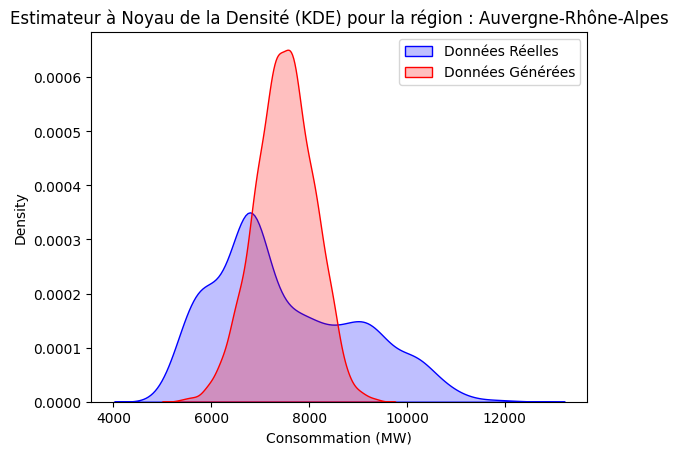

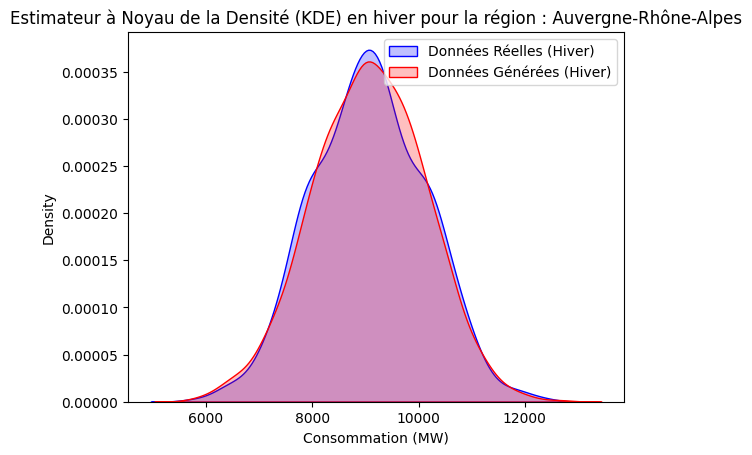

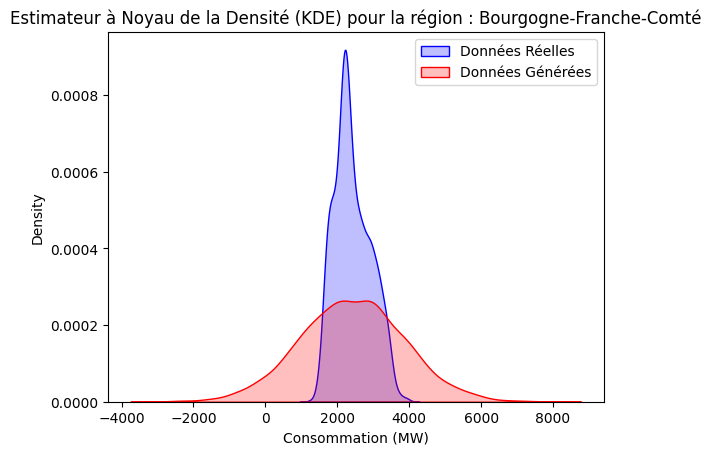

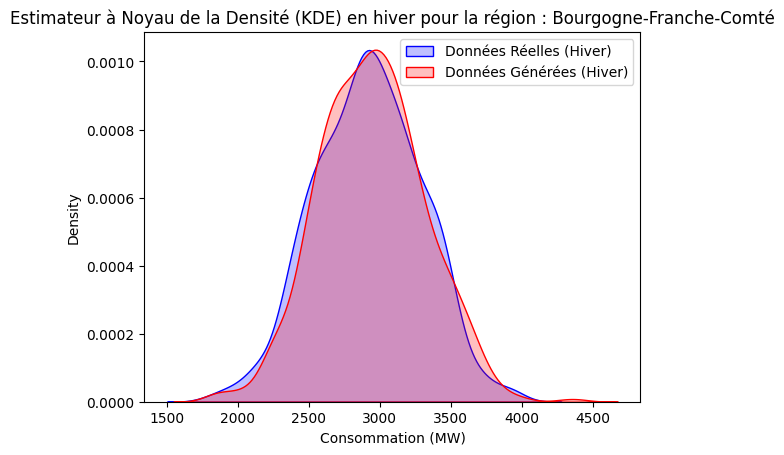

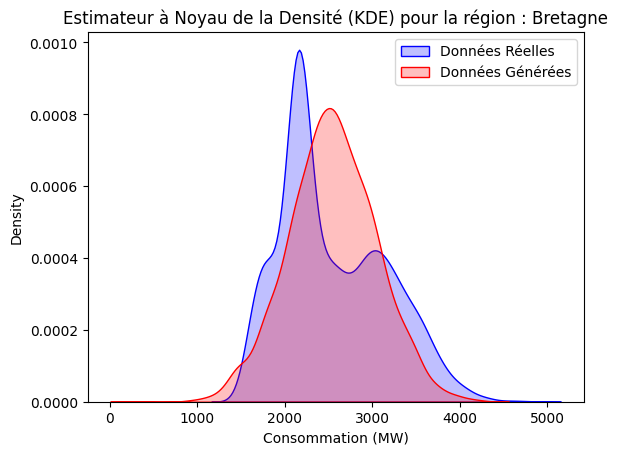

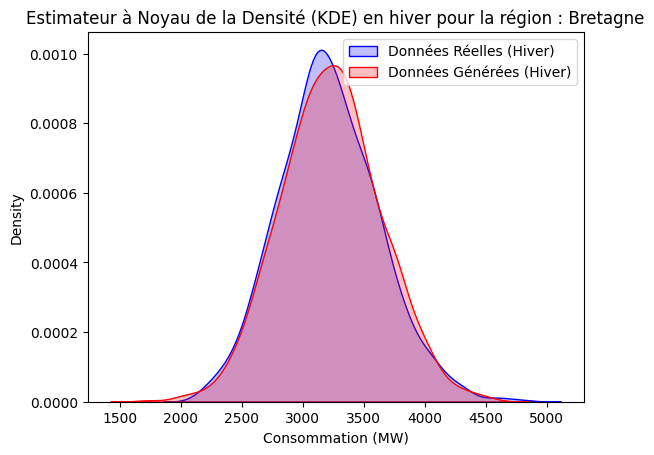

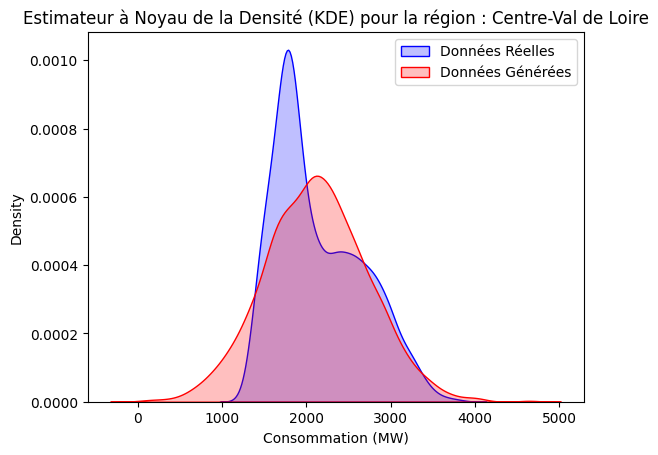

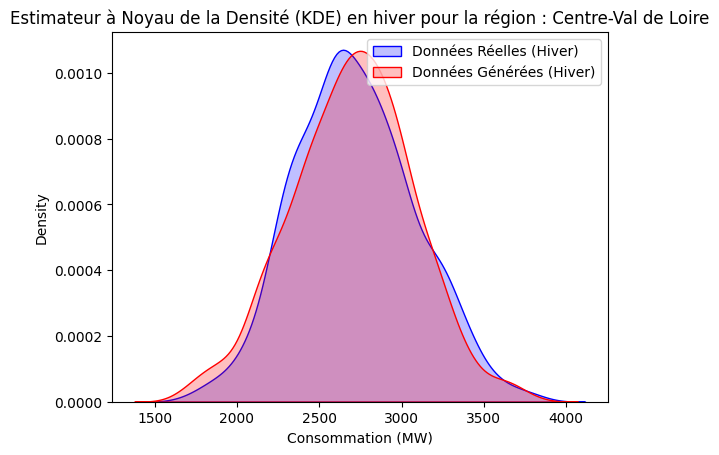

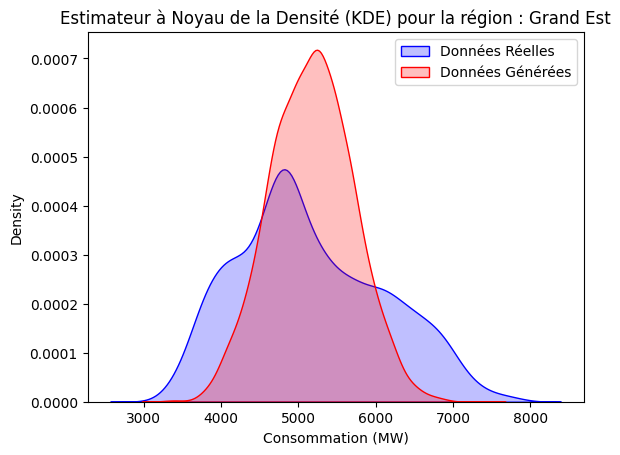

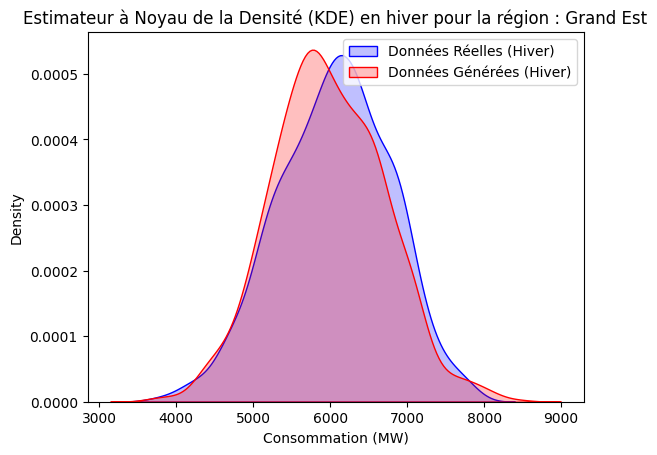

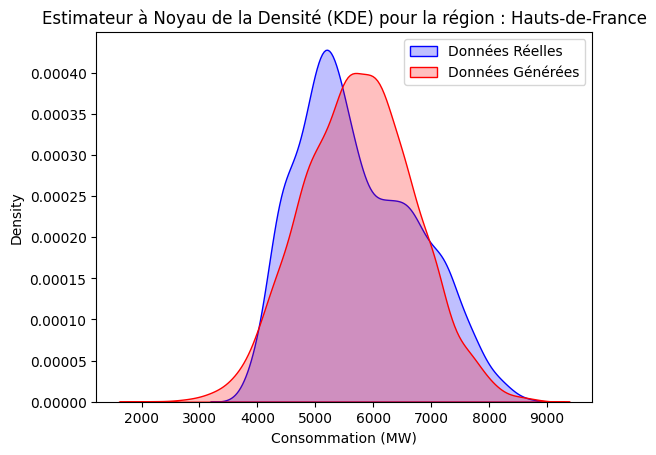

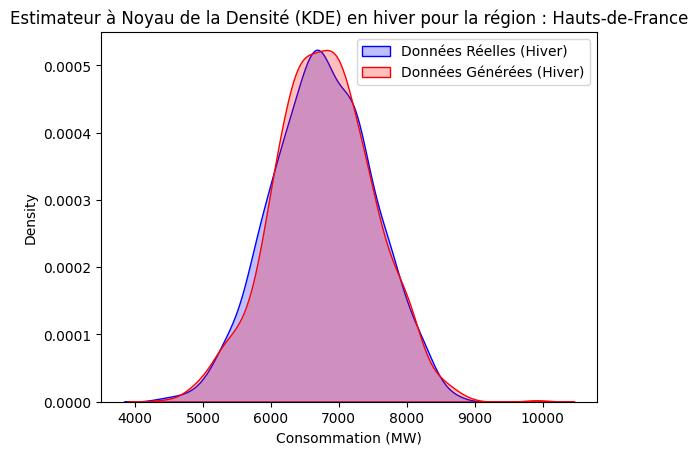

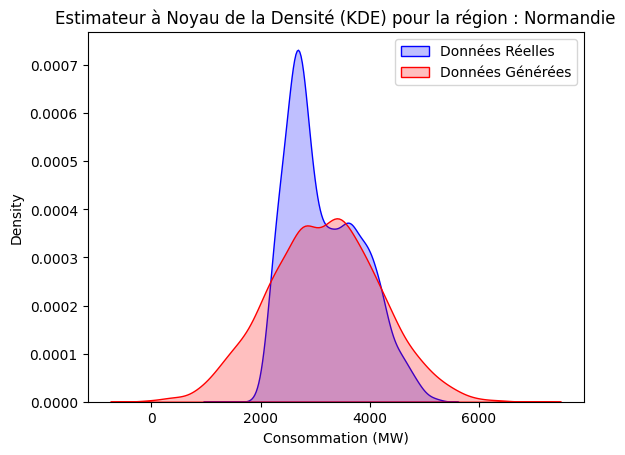

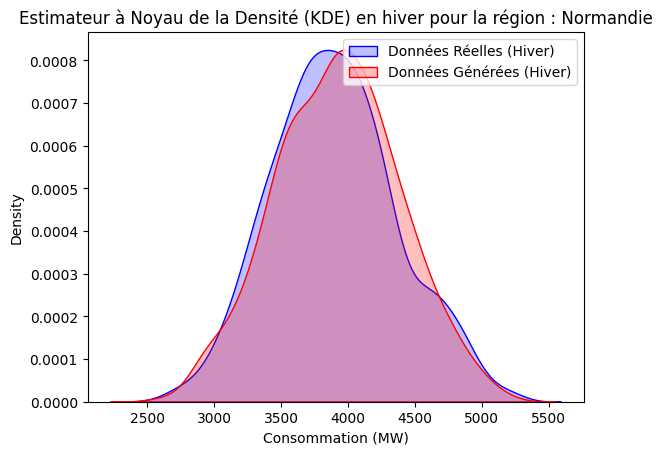

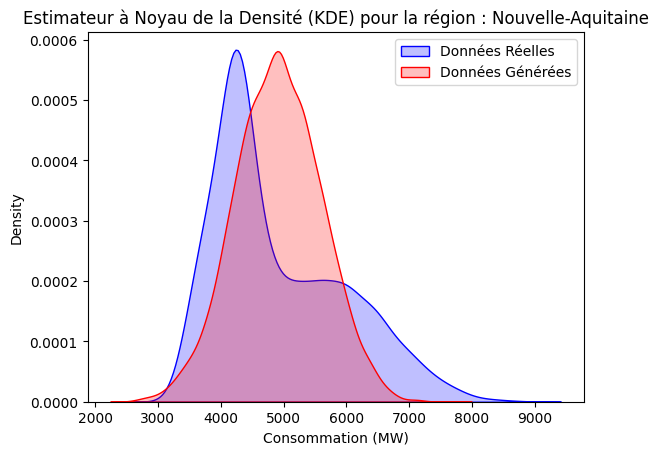

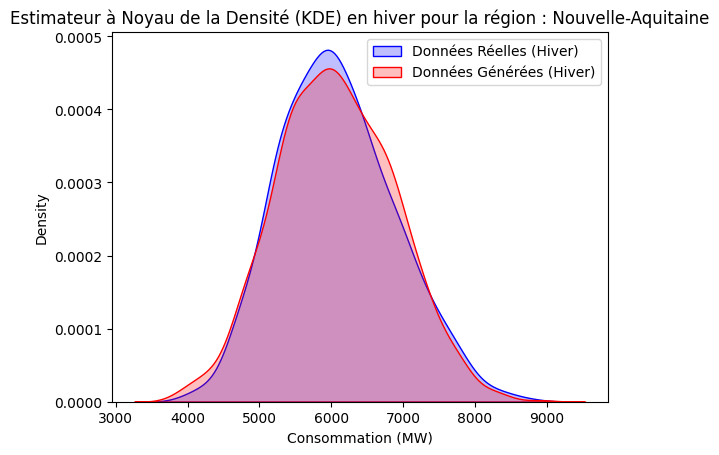

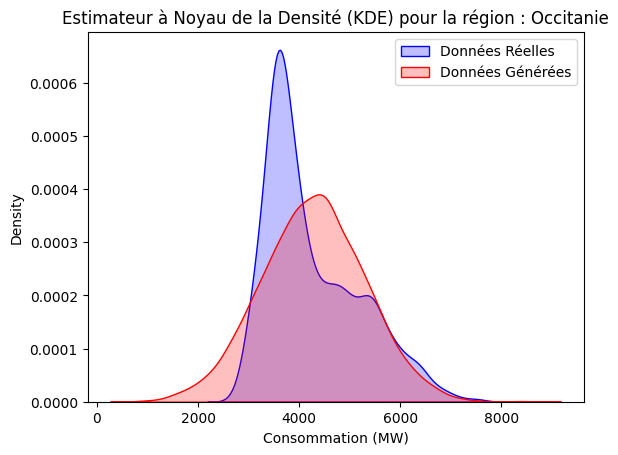

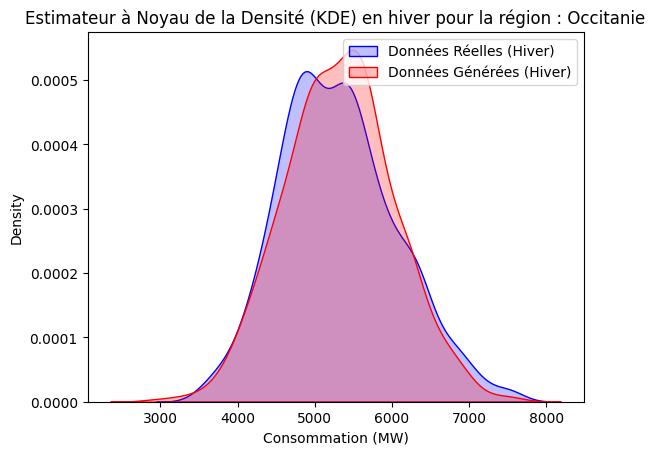

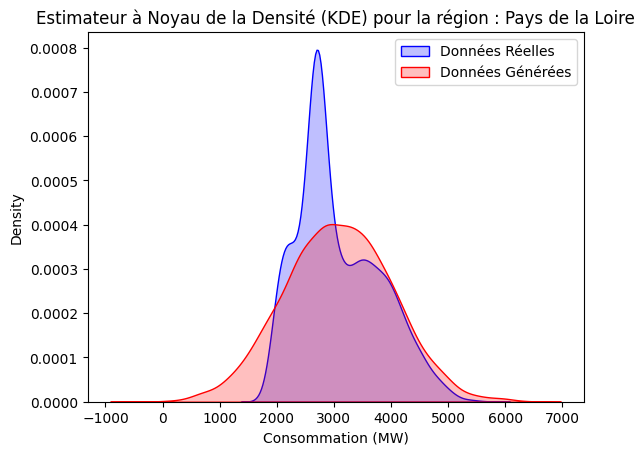

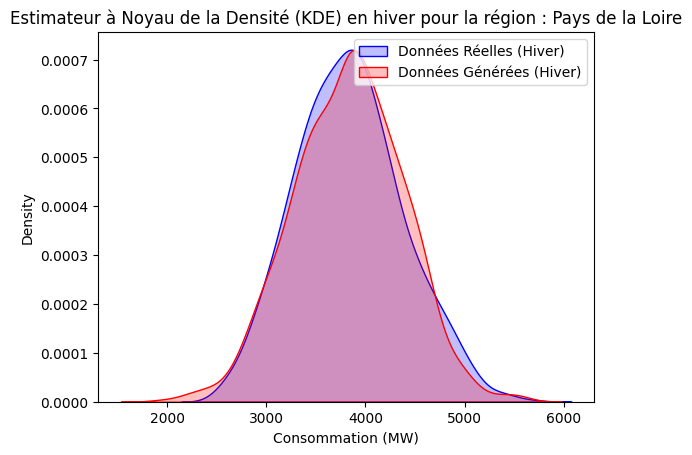

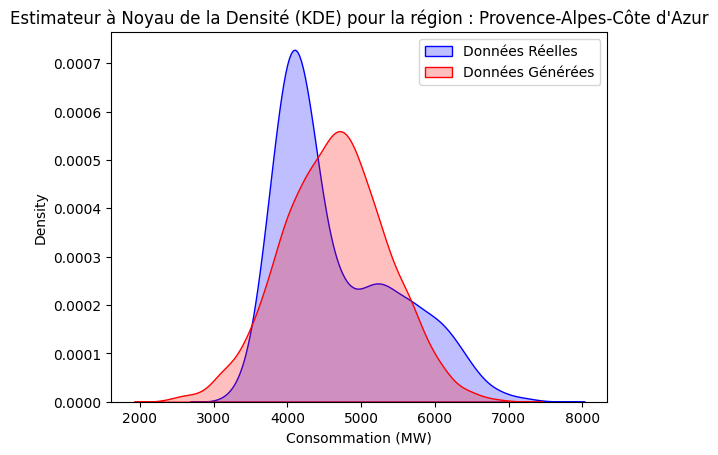

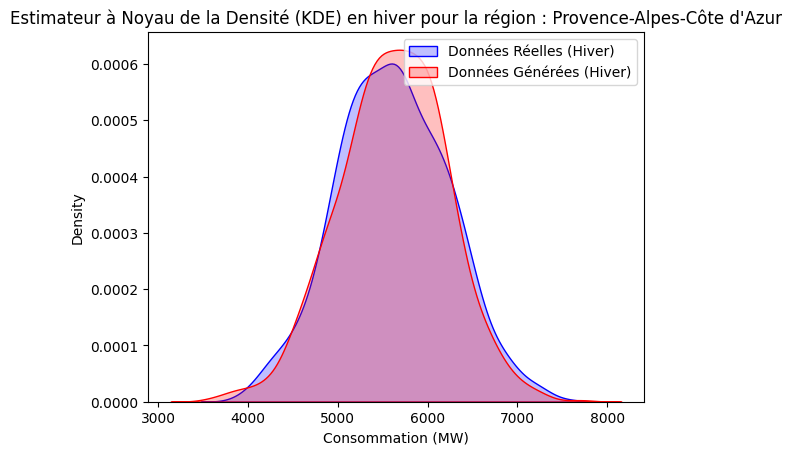

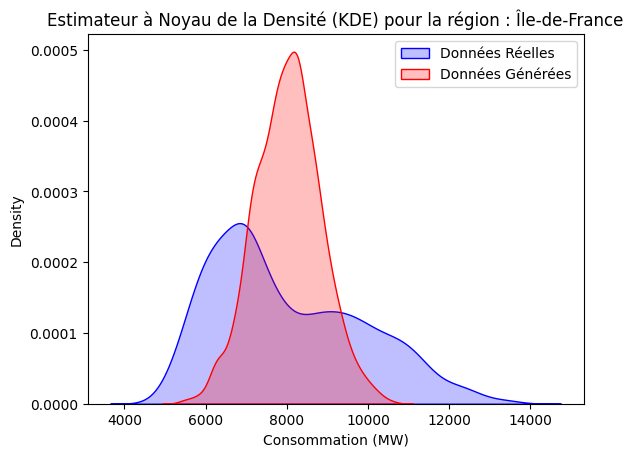

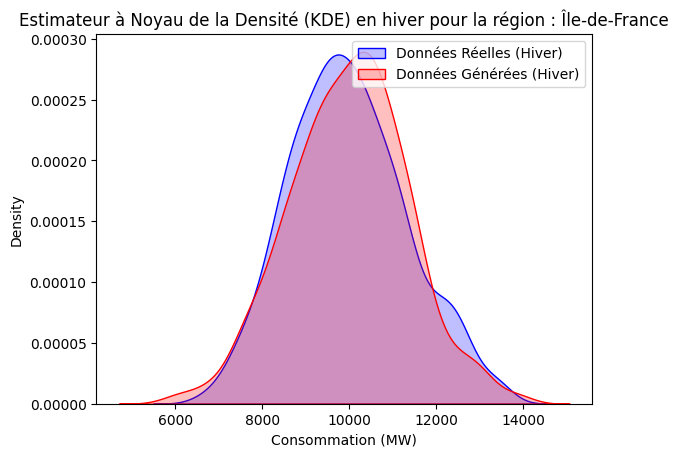

In [119]:
for region in df['region'].unique():
    df_region = df[df['region'] == region]
    mu_hat = df_region['consumption'].mean()
    new_data1 = np.random.normal(mu_hat, np.sqrt(sigma_squared_hat),n)
    # Calcul de l'estimateur de la variance (sigma_squared_hat)
    n = len(df_region)
    sigma_squared_hat = ((df_region['consumption'] - mu_hat) ** 2).sum() / (n - 1)
    
    # Tracer l'estimateur à noyau de la densité (KDE) des données réelles et des données générées
    sns.kdeplot(data=df_region, x="consumption", label="Données Réelles", color='blue', fill=True)
    sns.kdeplot(data=new_data1, label="Données Générées", color='red', fill=True)
    plt.title(f"Estimateur à Noyau de la Densité (KDE) pour la région : {region}")
    plt.xlabel("Consommation (MW)")
    plt.legend() 
    plt.show()
    winter_data = []
    for annee in range(2013, 2024):
        debut_hiver_1, fin_hiver_1 = datetime(annee, 1, 1), datetime(annee, 3, 21)
        debut_hiver_2, fin_hiver_2 = datetime(annee, 12, 22), datetime(annee, 12, 31)
    
        # Filtrer les données pour l'année donnée en utilisant les dates de début et de fin de l'hiver
        hiver_data = df_region[((df_region['date'] >= debut_hiver_1) & (df_region['date'] <= fin_hiver_1)) | ((df_region['date'] >= debut_hiver_2) & (df_region['date'] <= fin_hiver_2))]

        winter_data.extend(hiver_data['consumption'])

    # Convertir la liste en un DataFrame
    winter_data_df = pd.DataFrame({'consumption': winter_data})

    # Estimeurs de la moyenne et de la variance pour les jours d'hiver
    mu_hat_winter = winter_data_df['consumption'].mean()
    sigma_squared_hat_winter = ((winter_data_df['consumption'] - mu_hat_winter) ** 2).sum() / (len(winter_data_df) - 1)

    # Génération de nouvelles données gaussiennes pour les jours d'hiver
    new_data_winter = np.random.normal(mu_hat_winter, np.sqrt(sigma_squared_hat_winter), len(winter_data_df))

    # Tracer l'estimateur à noyau de la densité (KDE) des données réelles en hiver
    sns.kdeplot(data=winter_data_df, x="consumption", label="Données Réelles (Hiver)", color='blue', fill=True)

    #   Tracer l'estimateur à noyau de la densité (KDE) des données générées en hiver
    sns.kdeplot(data=new_data_winter, label="Données Générées (Hiver)", color='red', fill=True)

    plt.title(f"Estimateur à Noyau de la Densité (KDE) en hiver pour la région : {region}")
    plt.xlabel("Consommation (MW)")
    plt.legend()
    plt.show()







## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma$ =400MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0$ =3500MW et l'écart-type $\sigma_0$=500MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

La loi a posteriori de $\mu$ est donnée par la formule suivante :
$$
p(\mu | x_1, x_2, \ldots, x_n) \propto p(x_1, x_2, \ldots, x_n | \mu) \cdot p(\mu)
$$


$$
p(x_1, x_2, \ldots, x_n | \mu) = \frac{1}{(2\pi\sigma^2)^{n/2}} \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^{n}(x_i - \mu)^2\right)
$$


La formule complète pour la loi a posteriori de $\mu$ est donc :

$$
p(\mu | x_1, x_2, \ldots, x_n) \propto \frac{1}{(2\pi\sigma^2)^{n/2}} \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^{n}(x_i - \mu)^2\right) \cdot p(\mu)
$$

Or de plus :
$$
p(\mu) = \frac{1}{(2\pi\sigma_0^2)^{1/2}} \exp\left(-\frac{1}{2\sigma_0^2} (\mu - \mu_0 )^2\right)
$$

On obtient une loi normale de parametre m et $\nu$ :

$$
\frac{(\mu-m)^2}{\nu} = \frac{1}{2\sigma_0^2} (\mu - \mu_0 )^2 +\frac{1}{2\sigma^2} \sum_{i=1}^{n}(x_i - \mu)^2
$$

D'ou par identification:
$$
\nu=\frac{1}{ \frac{1}{\sigma_0^2}  + \frac{n}{\sigma^2} } $$
$$
m = \nu(  \frac{1}{\sigma^2}\sum_{i=1}^{n}(x_i )    + \frac{\mu_0}{\sigma_0^2}) 
$$




2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [120]:
# Paramètres a priori
sigma, mu_0, sigma_0 = 400, 3500, 500

# Préparez une liste vide pour stocker les paramètres de la loi a posteriori
parameters = []

# Boucle à travers les années de 2013 à 2023, j'ai décidé de prendre le debut de l'hiver et la fin de l'hiver prochain d'une meme année (choix arbitraire)
for annee in range(2013, 2024):
    debut_hiver_1, fin_hiver_1 = datetime(annee, 1, 1), datetime(annee, 3, 21)
    debut_hiver_2, fin_hiver_2 = datetime(annee, 12, 22), datetime(annee, 12, 31)

    # Filtrer les données pour l'année donnée en utilisant les dates de début et de fin de l'hiver
    year_data = df_region[((df_region['date'] >= debut_hiver_1) & (df_region['date'] <= fin_hiver_1)) | ((df_region['date'] >= debut_hiver_2) & (df_region['date'] <= fin_hiver_2))]

    # Calcul des paramètres de la loi a posteriori
    l = len(year_data)
    nu = 1 / (1 / (sigma_0 ** 2) + l / (sigma ** 2))
    mu = nu * (year_data['consumption'].sum() / (sigma ** 2) + mu_0 / (sigma_0 ** 2))
    parameters.append([annee, mu, np.sqrt(nu)]) # pour avoir l'écart-type

# Création et affichage d'un DataFrame
results_df = pd.DataFrame(parameters, columns=["Année", "Moyenne A Posteriori", "Écart-Type A Posteriori"])
print(results_df)



    Année  Moyenne A Posteriori  Écart-Type A Posteriori
0    2013          10965.191968                42.014582
1    2014           9818.027361                42.014582
2    2015          10354.644748                42.014582
3    2016          10232.693147                41.784716
4    2017          10227.493380                42.014582
5    2018          10218.832745                42.014582
6    2019           9833.208297                42.014582
7    2020           9333.326058                41.784716
8    2021           9599.845543                42.014582
9    2022           9391.604148                42.014582
10   2023           9082.291667                44.543540


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

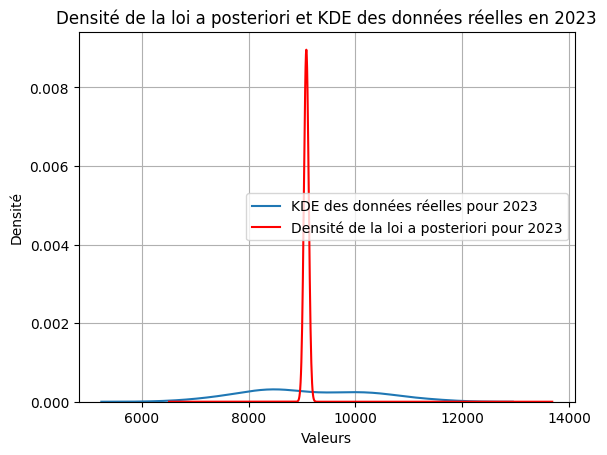

In [121]:
annee = 2023
debut_hiver_1, fin_hiver_1 = datetime(annee, 1, 1), datetime(annee, 3, 21)
debut_hiver_2, fin_hiver_2 = datetime(annee, 12, 22), datetime(annee, 12, 31)

# Filtrer les données pour l'année donnée en utilisant les dates de début et de fin de l'hiver
year_data = df_region[((df_region['date'] >= debut_hiver_1) & (df_region['date'] <= fin_hiver_1)) | ((df_region['date'] >= debut_hiver_2) & (df_region['date'] <= fin_hiver_2))]

# Calcul des paramètres de la loi a posteriori
l = len(year_data)
nu = 1 / (1 / (sigma_0 ** 2) + l / (sigma ** 2))
mu = nu * (year_data['consumption'].sum() / (sigma ** 2) + mu_0 / (sigma_0 ** 2))


#le *kde* des données réelles en 2023
sns.kdeplot(year_data, label="KDE des données réelles pour 2023", color='blue')

# densité de la loi a posteriori 
densite_loi_posteriori = norm(loc=mu, scale=np.sqrt(nu))
densite_loi_posteriori = densite_loi_posteriori.pdf(x)
plt.plot(x, densite_loi_posteriori, label="Densité de la loi a posteriori pour 2023", color='red')

plt.title("Densité de la loi a posteriori et KDE des données réelles en 2023")
plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Ce modele ne fit pas du tout, il est a revoir. 

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

On peut effectuer un test Neyman-Pearson de niveau α. 
Soit (X1, . . . , Xn) des v.a. gaussiennes indépendantes $ N(µ, σ_i^2)$. On notera $σ_0 = 400MW$ et $σ_1 = 500MW$. On remarqe que $σ_0$ < $σ_1$.

Considérons l’hypothèse de base H0 = {$σ_0$} et l’hypothèse alternative H1 = {$σ_1$}.

On peut calculer le rapport de vraisemblance : 
$$
Z(x) = \frac{p_1(x)}{p_0(x)} =\exp \left( -\frac{1}{2\sigma_1^2} \sum_{i=1}^{n}(x_i - \mu)^2 + \frac{1}{2\sigma_0^2} \sum_{i=1}^{n}(x_i - \mu)^2 \right)
$$
$$
=\exp \left( S.(\frac{1}{2\sigma_0^2} - \frac{1}{2\sigma_1^2})\right)
$$
On note $ S= (\sum_{i=1}^{n}(x_i - \mu)^2)$
Comme  $σ_0$ < $σ_1$, un UPP est donné par $ δ(x) = 1_{S>c} $, avec c une constante supérieure strictement à 0.

On sait que $S$ suit une distribution $\chi^2(n)$, et $\alpha = P_0(S>c) = P_0(\sigma_0^2 Z > c)$, où $Z$ suit une distribution $\chi^2(n)$. En utilisant la fonction quantile $Q$ de la distribution $\chi^2(n)$, on obtient :

$$
c = \frac{Q(1 - \alpha)}{\sigma_0^2}
$$



2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [122]:
# Paramètres connus
sigma_0 = 400  
mu_known = 3200  
sigma_0 = 400  
sigma_1 = 500  
alpha = 0.01  
annee = 2023

# Sélection des données pour la région Bretagne en hiver 2023
debut_hiver_1,fin_hiver_1 = datetime(annee, 1, 1), datetime(annee, 3, 21)
debut_hiver_2, fin_hiver_2 = datetime(annee, 12, 22), datetime(annee, 12, 31)
winter_data = df_region[((df_region['date'] >= debut_hiver_1) & (df_region['date'] <= fin_hiver_1)) | ((df_region['date'] >= debut_hiver_2) & (df_region['date'] <= fin_hiver_2))]
xi_values = winter_data['consumption'].values

# Calcul de la statistique du test
n = winter_data.shape[0]  
S = 0
for xi in xi_values:
    S += (xi - mu_known) ** 2
c = chi2.ppf(1 - alpha, df=n) * (sigma_0 ** 2)


#Résultat
result = "H1" if S / 2 > c else "H0"
print("Résultat du test:", result)


Résultat du test: H1


## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

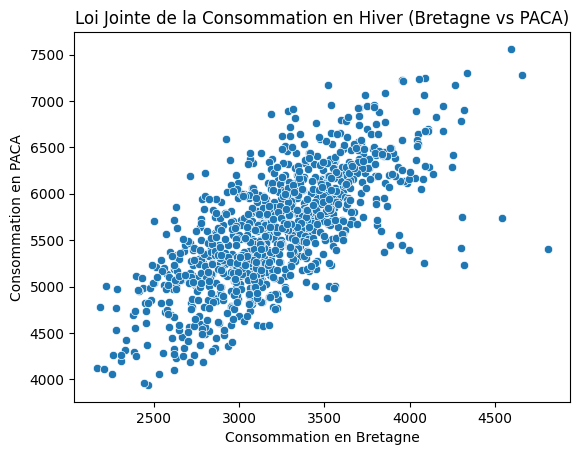

In [123]:
# Sélection des régions
region1 = "Bretagne"
region2 = "Provence-Alpes-Côte d'Azur"
df_bretagne = df[df['region'] == region1]
df_paca = df[df['region'] == region2]


# Création de listes pour stocker les données de consommation
consommation_bretagne = []
consommation_paca = []

# Filtrer et extraire les données de consommation pour chaque année
for annee in range(2013, 2024):
    # Sélection des données pour la région Bretagne et en Provence-Alpes-Côte d'Azur en hiver
    debut_hiver_1, fin_hiver_1 = datetime(annee, 1, 1), datetime(annee, 3, 21)
    debut_hiver_2, fin_hiver_2 = datetime(annee, 12, 22), datetime(annee, 12, 31)
    df_bretagne_hiver = df_bretagne[((df_bretagne['date'] >= debut_hiver_1) & (df_bretagne['date'] <= fin_hiver_1)) | ((df_bretagne['date'] >= debut_hiver_2) & (df_bretagne['date'] <= fin_hiver_2))]
    df_paca_hiver = df_paca[((df_paca['date'] >= debut_hiver_1) & (df_paca['date'] <= fin_hiver_1)) | ((df_paca['date'] >= debut_hiver_2) & (df_paca['date'] <= fin_hiver_2))]
    
    # Extraire les données de consommation pour chaque région
    consommation_bretagne.extend(df_bretagne_hiver['consumption'].tolist())
    consommation_paca.extend(df_paca_hiver['consumption'].tolist())

# Création d'un nuage de points pour visualiser la loi jointe
sns.scatterplot(x=consommation_bretagne, y=consommation_paca)
plt.xlabel("Consommation en Bretagne")
plt.ylabel("Consommation en PACA")
plt.title("Loi Jointe de la Consommation en Hiver (Bretagne vs PACA)")
plt.show()

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

En regardant le graphique précedent on peut conclure que les consommations dans ces 2 régions sont bien dépendantes. On peut calculer le coefficient de corrélation et on voit bien qu'il y a corrélation (coeff de corrélation > 0.05, choix arbitraire). 

In [125]:
# Calculez le coefficient de corrélation de Pearson
correlation_coefficient = np.corrcoef(consommation_bretagne, consommation_paca)[0, 1]

# Affichez le coefficient de corrélation
print("Coefficient de corrélation de Pearson :", correlation_coefficient)

Coefficient de corrélation de Pearson : 0.7167804364647985


3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Pour vérifier l'indépendance de la consommation dans les régions de Bretagne et de Provence-Alpes-Côte d'Azur, nous pouvons utiliser le test du Chi-2. Ce test permet de déterminer si les deux variables sont indépendantes ou s'il existe une relation significative entre elles.

L'hypothèse nulle ($H_0$) du test est que la consommation dans ces deux régions est indépendante, tandis que l'hypothèse alternative ($H_1$) est que la consommation n'est pas indépendante. Le niveau  $\alpha$ est choisi pour évaluer la significativité du test.

Le test du Chi-2 nécessite de créer un tableau de contingence qui répertorie les fréquences des différentes combinaisons de valeurs de consommation dans les deux régions. Ensuite, le test calcule la statistique du Chi-2 en comparant les fréquences observées avec les fréquences attendues sous l'hypothèse d'indépendance.

Si la statistique du Chi-2 calculée est supérieure à un certain seuil critique, nous pouvons rejeter l'hypothèse nulle et conclure qu'il existe une relation significative entre la consommation dans les deux régions.

Le choix du seuil critique dépend du niveau de signification $\alpha$. Plus $\alpha$ est faible, plus le test est strict en termes de rejet de l'hypothèse nulle.

4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [142]:
from scipy.stats import chi2_contingency
# Création d'un tableau de contingence
observed_data = np.array([consommation_bretagne, consommation_paca])

# Effectuer le test du Chi-2
chi2_stat, p, _, _ = chi2_contingency(observed_data)
print("Statistique du Chi-2 :", chi2_stat)

alpha = 0.01  # Niveau de signification
degrees_of_freedom = (observed_data.shape[0] - 1) * (observed_data.shape[1] - 1)
critical_value = chi2.ppf(1 - alpha, df=degrees_of_freedom)

print("Valeur critique du Chi-2 :", critical_value)

print("Valeur du p:", p)

if chi2_stat > critical_value:
    print("Rejeter l'hypothèse nulle : Il existe une corrélation significative entre la consommation en Bretagne et en PACA.")
else:
    print("Ne pas rejeter l'hypothèse nulle : La consommation en Bretagne et en PACA est indépendante.")

Statistique du Chi-2 : 16442.45517172823
Valeur critique du Chi-2 : 1086.9758002558094
Valeur du p: 0.0
Rejeter l'hypothèse nulle : Il existe une corrélation significative entre la consommation en Bretagne et en PACA.


## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

In [145]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

winter_data = []
for annee in range(2013, 2024):
        debut_hiver_1, fin_hiver_1 = datetime(annee, 1, 1), datetime(annee, 3, 21)
        debut_hiver_2, fin_hiver_2 = datetime(annee, 12, 22), datetime(annee, 12, 31)
    
        # Filtrer les données pour l'année donnée en utilisant les dates de début et de fin de l'hiver
        hiver_data = df_region[((df_region['date'] >= debut_hiver_1) & (df_region['date'] <= fin_hiver_1)) | ((df_region['date'] >= debut_hiver_2) & (df_region['date'] <= fin_hiver_2))]
        winter_data.extend(hiver_data['consumption'])
# Convertissez la liste en un DataFrame
donnees_reelles_hiver_df = pd.DataFrame({'consumption': winter_data})

# Calcul des paramètres mu et sigma_square (moyenne et variance)
mu = donnees_reelles_hiver_df["consumption"].mean()
sigma_square = donnees_reelles_hiver_df["consumption"].var()

# Taille de l'échantillon
n = donnees_reelles_hiver_df["consumption"].count().astype(int)

# Niveau de confiance (95% dans ce cas)
alpha = 0.05

# Calcul du quantile pour la distribution normale
_critical = norm.ppf(1 - alpha/2)

# Calcul de l'erreur standard de la moyenne
standard_error = np.sqrt(sigma_square) / np.sqrt(n)

# Calcul de l'intervalle de confiance
margin_error = _critical * standard_error
confidence_interval = (mu - margin_error, mu + margin_error)

print(f"Intervalle de confiance à 95%: {confidence_interval[0]}, {confidence_interval[1]})")

Intervalle de confiance à 95%: 3188.567522649083, 3239.7888928295324)


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

In [146]:
from scipy.stats import ttest_1samp

annee = 2023
debut_hiver_1, fin_hiver_1 = datetime(annee, 1, 1), datetime(annee, 3, 21)
debut_hiver_2, fin_hiver_2 = datetime(annee, 12, 22), datetime(annee, 12, 31)

# Filtrer les données pour l'année donnée en utilisant les dates de début et de fin de l'hiver
year_data = df_region[((df_region['date'] >= debut_hiver_1) & (df_region['date'] <= fin_hiver_1)) | ((df_region['date'] >= debut_hiver_2) & (df_region['date'] <= fin_hiver_2))]

# Valeur hypothétique pour la moyenne (hypothesis mean)
hypothesis_mean = 3100  # en MW

# Convertissez la colonne 'consumption' en un DataFrame
donnees_reelles_hiver_df = year_data[['consumption']]

# Effectuez le test de Student
t_statistic, p_value = ttest_1samp(donnees_reelles_hiver_df, hypothesis_mean)

# Niveau de confiance (95% dans ce cas)
alpha = 0.05

# Affichez les résultats
print(f"Statistique de test (t) : {t_statistic}")
print(f"Valeur de p : {p_value}")

if p_value < alpha:
    print("L'hypothèse nulle est rejetée. La moyenne de la consommation en 2023 n'est pas égale à 3100 MW.")
else:
    print("L'hypothèse nulle n'est pas rejetée. La moyenne de la consommation en 2023 est égale à 3100 MW (au niveau de confiance de 95%).")

Statistique de test (t) : [0.30764816]
Valeur de p : [0.75915969]
L'hypothèse nulle n'est pas rejetée. La moyenne de la consommation en 2023 est égale à 3100 MW (au niveau de confiance de 95%).
